# สนามไฟฟ้าเนื่องจากประจุแบบเส้น

หาสนามไฟฟ้าเนื่องจากประจุแบบจุดหลายตัว ขนาดตัวละ $1~\mu C$ วางอยู่บนเส้นตรงยาว $1~m$ โดยมีระยะห่างกัน $1~cm$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from libemag.emag_initials import *
from libemag.plots import field_plot

In [28]:
Q = 1e-6
Yp = np.linspace(-0.5, 0.5, 1000)
Xp = np.zeros(len(Yp))

(-2.0, 2.0)

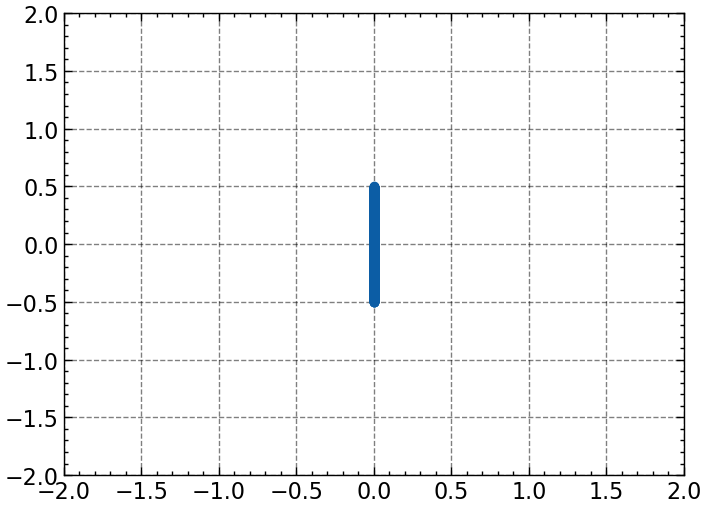

In [29]:
plt.scatter(Xp, Yp)
plt.xlim([-2, 2])
plt.ylim([-2, 2])

In [30]:
def E(x, y):
    r = np.array([x, y])
    E_total = 0
    for i in range(len(Xp)):
        rp = np.array([Xp[i], Yp[i]])
        R = r - rp
        field = Q / (4 * pi * epsilon_0) * R / norm(R)**3
        E_total += field
    return E_total

In [31]:
E(1, 2)

array([ 866767.9169494 , 1647582.35188974])

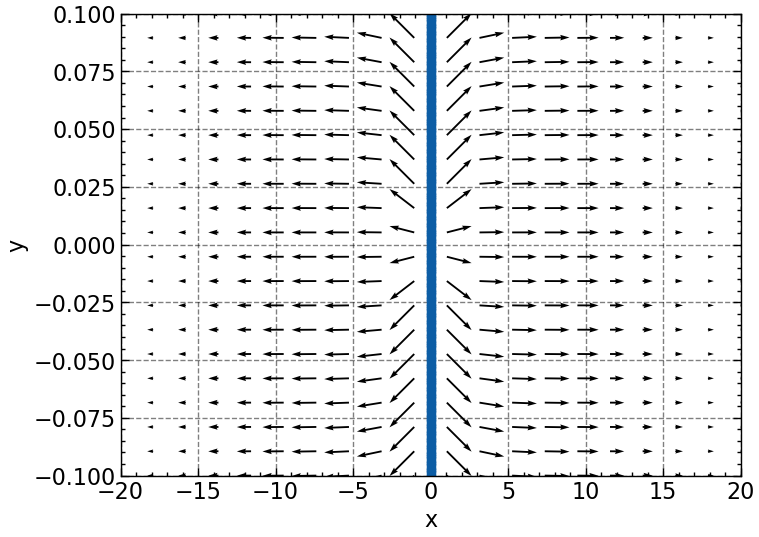

In [32]:
plt.scatter(Xp, Yp)
field_plot(E, x_min=-20, x_max=20, y_min=-0.1, y_max=0.1)

## Symbolic Mathematics using Sympy

In [1]:
import sympy as smp

In [12]:
z = smp.symbols('z')

In [16]:
rho_v = 10.0 * (1.0 - smp.exp(-0.5 * z))
rho_v

10.0 - 10.0*exp(-0.5*z)

In [17]:
smp.integrate(rho_v, z)

10.0*z + 20.0*exp(-0.5*z)

In [18]:
smp.integrate(rho_v, [z, 0, 1])

2.13061319425267

In [21]:
theta = smp.symbols('theta')
theta

theta

In [24]:
smp.integrate(smp.cos(theta) * smp.sin(theta))

sin(theta)**2/2

In [27]:
smp.integrate(smp.cos(theta) * smp.sin(theta), [theta, 0, smp.pi / 2])

1/2

### สนามไฟฟ้าเนื่องจากประจุแบบเส้นตรง

In [1]:
import sympy as smp
import numpy as np
import matplotlib.pyplot as plt
from libemag.emag_initials import *
from libemag.plots import field_plot
import scipy as sp

In [2]:
rho_l, x, y, epsilon_0, yp = smp.symbols("rho_l x y epsilon_0 y'")

In [3]:
r = smp.Matrix([x, y])
rp = smp.Matrix([0, yp])
R = r - rp

dEdyp = rho_l / (4 * smp.pi * epsilon_0) * (R / R.norm()**3)
dEdyp

Matrix([
[       rho_l*x/(4*pi*epsilon_0*(Abs(x)**2 + Abs(y - y')**2)**(3/2))],
[rho_l*(y - y')/(4*pi*epsilon_0*(Abs(x)**2 + Abs(y - y')**2)**(3/2))]])

In [5]:
# Integrate for E
E = smp.integrate(dEdyp, [yp, -0.5, 0.5]).subs({rho_l:1e-6, smp.pi:np.pi, epsilon_0:sp.constants.epsilon_0})
E

Matrix([
[8987.55179226117*x*(0.5 - y)/(sqrt((0.5 - y)**2/Abs(x)**2 + 1)*Abs(x)**3) - 8987.55179226117*x*(-y - 0.5)/(sqrt((-y - 0.5)**2/Abs(x)**2 + 1)*Abs(x)**3)],
[                              -8987.55179226117/(sqrt((-y - 0.5)**2/Abs(x)**2 + 1)*Abs(x)) + 8987.55179226117/(sqrt((0.5 - y)**2/Abs(x)**2 + 1)*Abs(x))]])

In [8]:
E_f = smp.lambdify([x, y], E)
E_f

<function _lambdifygenerated(x, y)>

In [15]:
E_field = E_f(1, 2)
E_field

array([[ 866.63723311],
       [1647.50380386]])

In [19]:
def E_func(x, y):
    Ex = E_f(x, y)[0][0]
    Ey = E_f(x, y)[1][0]
    return np.array([Ex, Ey])

In [20]:
E_func(1, 2)

array([ 866.63723311, 1647.50380386])

In [23]:
# Line charge
Y = np.linspace(-0.5, 0.5, 3)
X = np.zeros(len(Y))

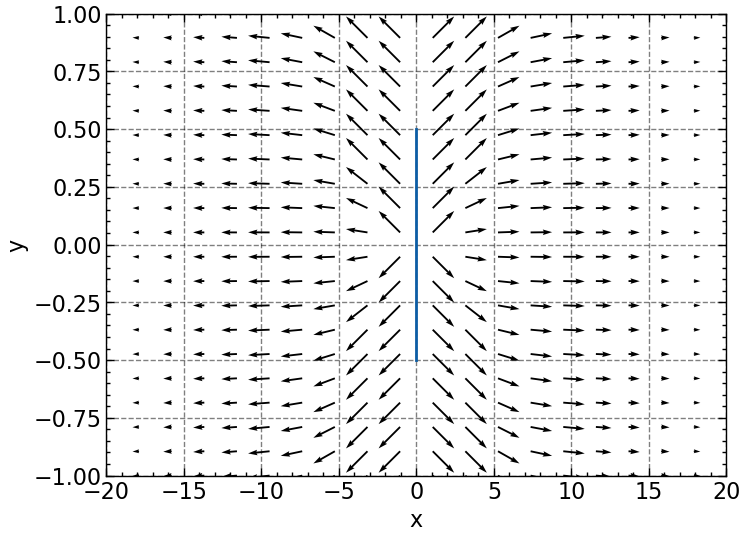

In [26]:
plt.plot(X, Y)
field_plot(E_func, x_min=-20, x_max=20, y_min=-1, y_max=1)

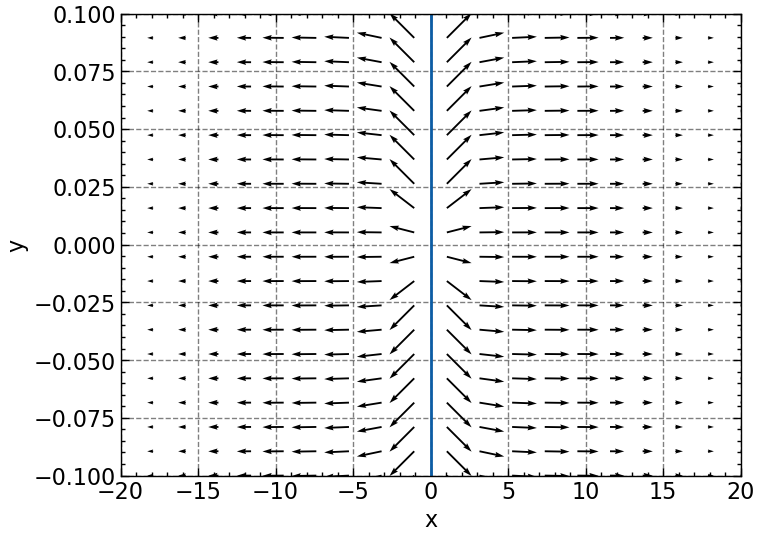

In [27]:
plt.plot(X, Y)
field_plot(E_func, x_min=-20, x_max=20, y_min=-0.1, y_max=0.1)

## สนามไฟฟ้าจากประจุรูปแบบใด ๆ
$$\mathbf{dE}=\frac{dq}{4\pi\epsilon_0}\frac{\mathbf{r-r'}}{|\mathbf{r-r'}|^3}$$
$$\mathbf{E(r)}=\int\mathbf{dE}$$

Line Charge Definition
$$dq=\rho_l(r')d\mathbf{r'}$$

Parameterised
$$dq=\rho_l(r')\left\|\frac{d\mathbf{r'}}{dt}\right\|dt$$

จงหาสนามไฟฟ้าเนื่องจากประจุแบบเส้นยาว $10~m$ ที่วางอยู่บนแนวแกน $y$ โดยที่ประจุนี้มีความหนาแน่นประจุสม่ำเสมอ $\rho_l=1~\mu C/m$

ในกรณีนี้
$$\mathbf{r'}=
\begin{bmatrix}
0\\
t
\end{bmatrix}$$